# Centered Kernel Alignment (CKA)

This script shows how to calculate CKA for the deep proprioceptive models, based on Kornblith et al 2019: https://arxiv.org/abs/1905.00414

In [1]:
import numpy as np
from kornblith_et_al_rsa_colab import *
from rowwise_neuron_curves_controls import lstring
import seaborn as sns
import os, pickle
import copy
import matplotlib.pyplot as plt
from controls_main import RunInfo

def cca(features_x, features_y):
    """Compute the mean squared CCA correlation (R^2_{CCA}).
    From: Kornblith et al 2019

    Args:
      features_x: A num_examples x num_features matrix of features.
      features_y: A num_examples x num_features matrix of features.

    Returns:
      The mean squared CCA correlations between X and Y.
      
    """
    qx, _ = np.linalg.qr(features_x)  # Or use SVD with full_matrices=False.
    qy, _ = np.linalg.qr(features_y)
    return np.linalg.norm(qx.T.dot(qy)) ** 2 / min(features_x.shape[1], features_y.shape[1])

No module named 'tensorflow'
proceeding without savelouts , this will only work if no data is being generated


Specify model and run info

In [6]:
modelinfo = dict({'type': 'S',
            'base': 'spatial_temporal_4_8-16-16-32_64-64-64-64_5272',
            'name': 'spatial_temporal_4_8-16-16-32_64-64-64-64_5272_1',
            'shortbase': 'Spatial-Temporal',
            'shortname': 'Spatial-Temporal_1',
            'nlayers': 8,
            'max_act': 14,
            'control': False,
            'cmap': 'Blues_r',
            'color': 'C0',
            'control_cmap': 'Purples_r'})

runinfo = RunInfo({'expid': 102, #internal experiment id
                   'datafraction': 0.5,
                   'randomseed': 2000,
                   'randomseed_traintest': 42,
                   'dirr2threshold': 0.2,
                   'verbose': 0,
                   'model_experiment_id': 4, #as per Pranav's model generation
                   'basefolder' : '/mnt/data/random_controls/',
                   'orientation' : 'hor',
                   'height' : 'all'
            })

internal vars

In [7]:
n_instantiations = 5

perform comparisons

In [16]:
nlayers = modelinfo['nlayers']

cka_matrix = np.zeros((n_instantiations, nlayers + 1))

for iinsta in np.arange(0,n_instantiations):
    
    trainedmodel = modelinfo.copy()
    trainedmodel['name'] = modelinfo['base'] + '_%d' %(iinsta+1)

    controlmodel = modelinfo.copy()
    controlmodel['name'] = modelinfo['base'] + '_%dr' %(iinsta+1)

    for ilayer in np.arange(-1, nlayers):
        layer = lstring(ilayer)  
        X = pickle.load(open(os.path.join(runinfo.datafolder(trainedmodel), layer + '.pkl'), 'rb'))
        X = X.reshape((X.shape[0], -1))                    
        Y = pickle.load(open(os.path.join(runinfo.datafolder(controlmodel), layer + '.pkl'), 'rb'))
        Y = Y.reshape((Y.shape[0], -1))

        #print("Layer %d " %(ilayer + 1))
        #print("X Shape: %s, Y Shape: %s" %(X.shape, Y.shape))

        cka_from_examples = cka(gram_linear(X), gram_linear(Y))

        cka_matrix[iinsta, ilayer + 1] = cka_from_examples

/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/mnt/data/random_controls/
/

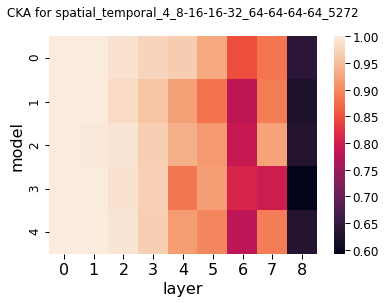

In [17]:
cka_ax = sns.heatmap(cka_matrix)
cka_ax.set_xlabel('layer')
cka_ax.set_ylabel('model')
cka_ax.set_title('CKA for %s' %modelinfo['shortbase'])
fig = cka_ax.get_figure()